In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/content/drive/MyDrive/extracted_files/company_cleaned.csv")

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
data.head()

funding_rounds  funding_total_usd  first_milestone_at  last_milestone_at  \
0             3.0         10125293.0                2010               2010   
1             1.0          1500000.0                2010               2010   
2             1.0          2500000.0                2010               2012   
3             1.0            40000.0                2012               2012   
4             1.0           350000.0                2008               2008   

   milestones  relationships        lat         lng  founded_year  \
0         1.0            6.0  30.267153  -97.743061          2003   
1         1.0            8.0  47.610150 -122.201516          2004   
2         2.0            7.0  37.774929 -122.419415          2006   
3         1.0            5.0  37.774929 -122.419415          2011   
4         1.0            2.0  37.452960 -122.181725          2007   

   category_advertising  ...  country_NLD  country_RUS  country_USA  \
0                     0  ...            0            0            1   
1                     0  ...            0            0            1   
2                     0  ...            0            0            1   
3                     0  ...            0            0            1   
4                     0  ...            0            0            1   

   country_other  isClosed  active_years  active_days  target  \
0              0         1          18.0       6570.0       1   
1              0         1          17.0       6205.0       1   
2              0         1          15.0       5475.0       1   
3              0         1          10.0       3650.0       1   
4              0         1          14.0       5110.0       1   

   first_funding_days  last_funding_days  
0              6086.0             6410.0  
1              6268.0             6268.0  
2              4832.0             4832.0  
3              6327.0             6327.0  
4              4863.0             4863.0  

[5 rows x 69 columns]

# 🌍 Identifying `object` Columns in a DataFrame

In [85]:
object_columns = data.select_dtypes(include=['object']).columns
print("Colonnes de type object (texte/catégorielles) :")
print(object_columns.tolist())

Colonnes de type object (texte/catégorielles) :
['country_code_generalized']


# 🌍 **Displaying Unique Values of a Column in a DataFrame**

In [86]:
print("Valeurs uniques de 'country_code_generalized' :")
print(data['country_code_generalized'].unique())

Valeurs uniques de 'country_code_generalized' :
['USA' 'RUS' 'other' 'ISR' 'GBR' 'FRA' 'ESP' 'DEU' 'CAN' 'IRL' 'NLD']


#🌍 **Transforming Categories into Probabilities with `value_counts(normalize=True)`**

In [87]:
probas = data['country_code_generalized'].value_counts(normalize=True)
data['country_code_generalized'] = data['country_code_generalized'].map(probas)
print("Aperçu après transformation :")
print(data[['country_code_generalized']].head())


Aperçu après transformation :
   country_code_generalized
0                  0.698334
1                  0.698334
2                  0.698334
3                  0.698334
4                  0.698334


## **2. Feature selection**

## **2.1 Correlation Matrix with Heatmap**

#  **Correlation Matrix & Strongest Correlations**  

##  **Explanation**
The correlation matrix helps us visualize the **linear relationships** between numerical variables in a dataset.  
We use **Seaborn** to plot a heatmap of correlations and then extract the **strongest positive and negative correlations**.  

The code below:  
1. Computes the correlation matrix with `data.corr()`.  
2. Plots a **heatmap** with annotations.  
3. Prints the **Top 20 strongest positive** and **Top 20 strongest negative correlations**.  

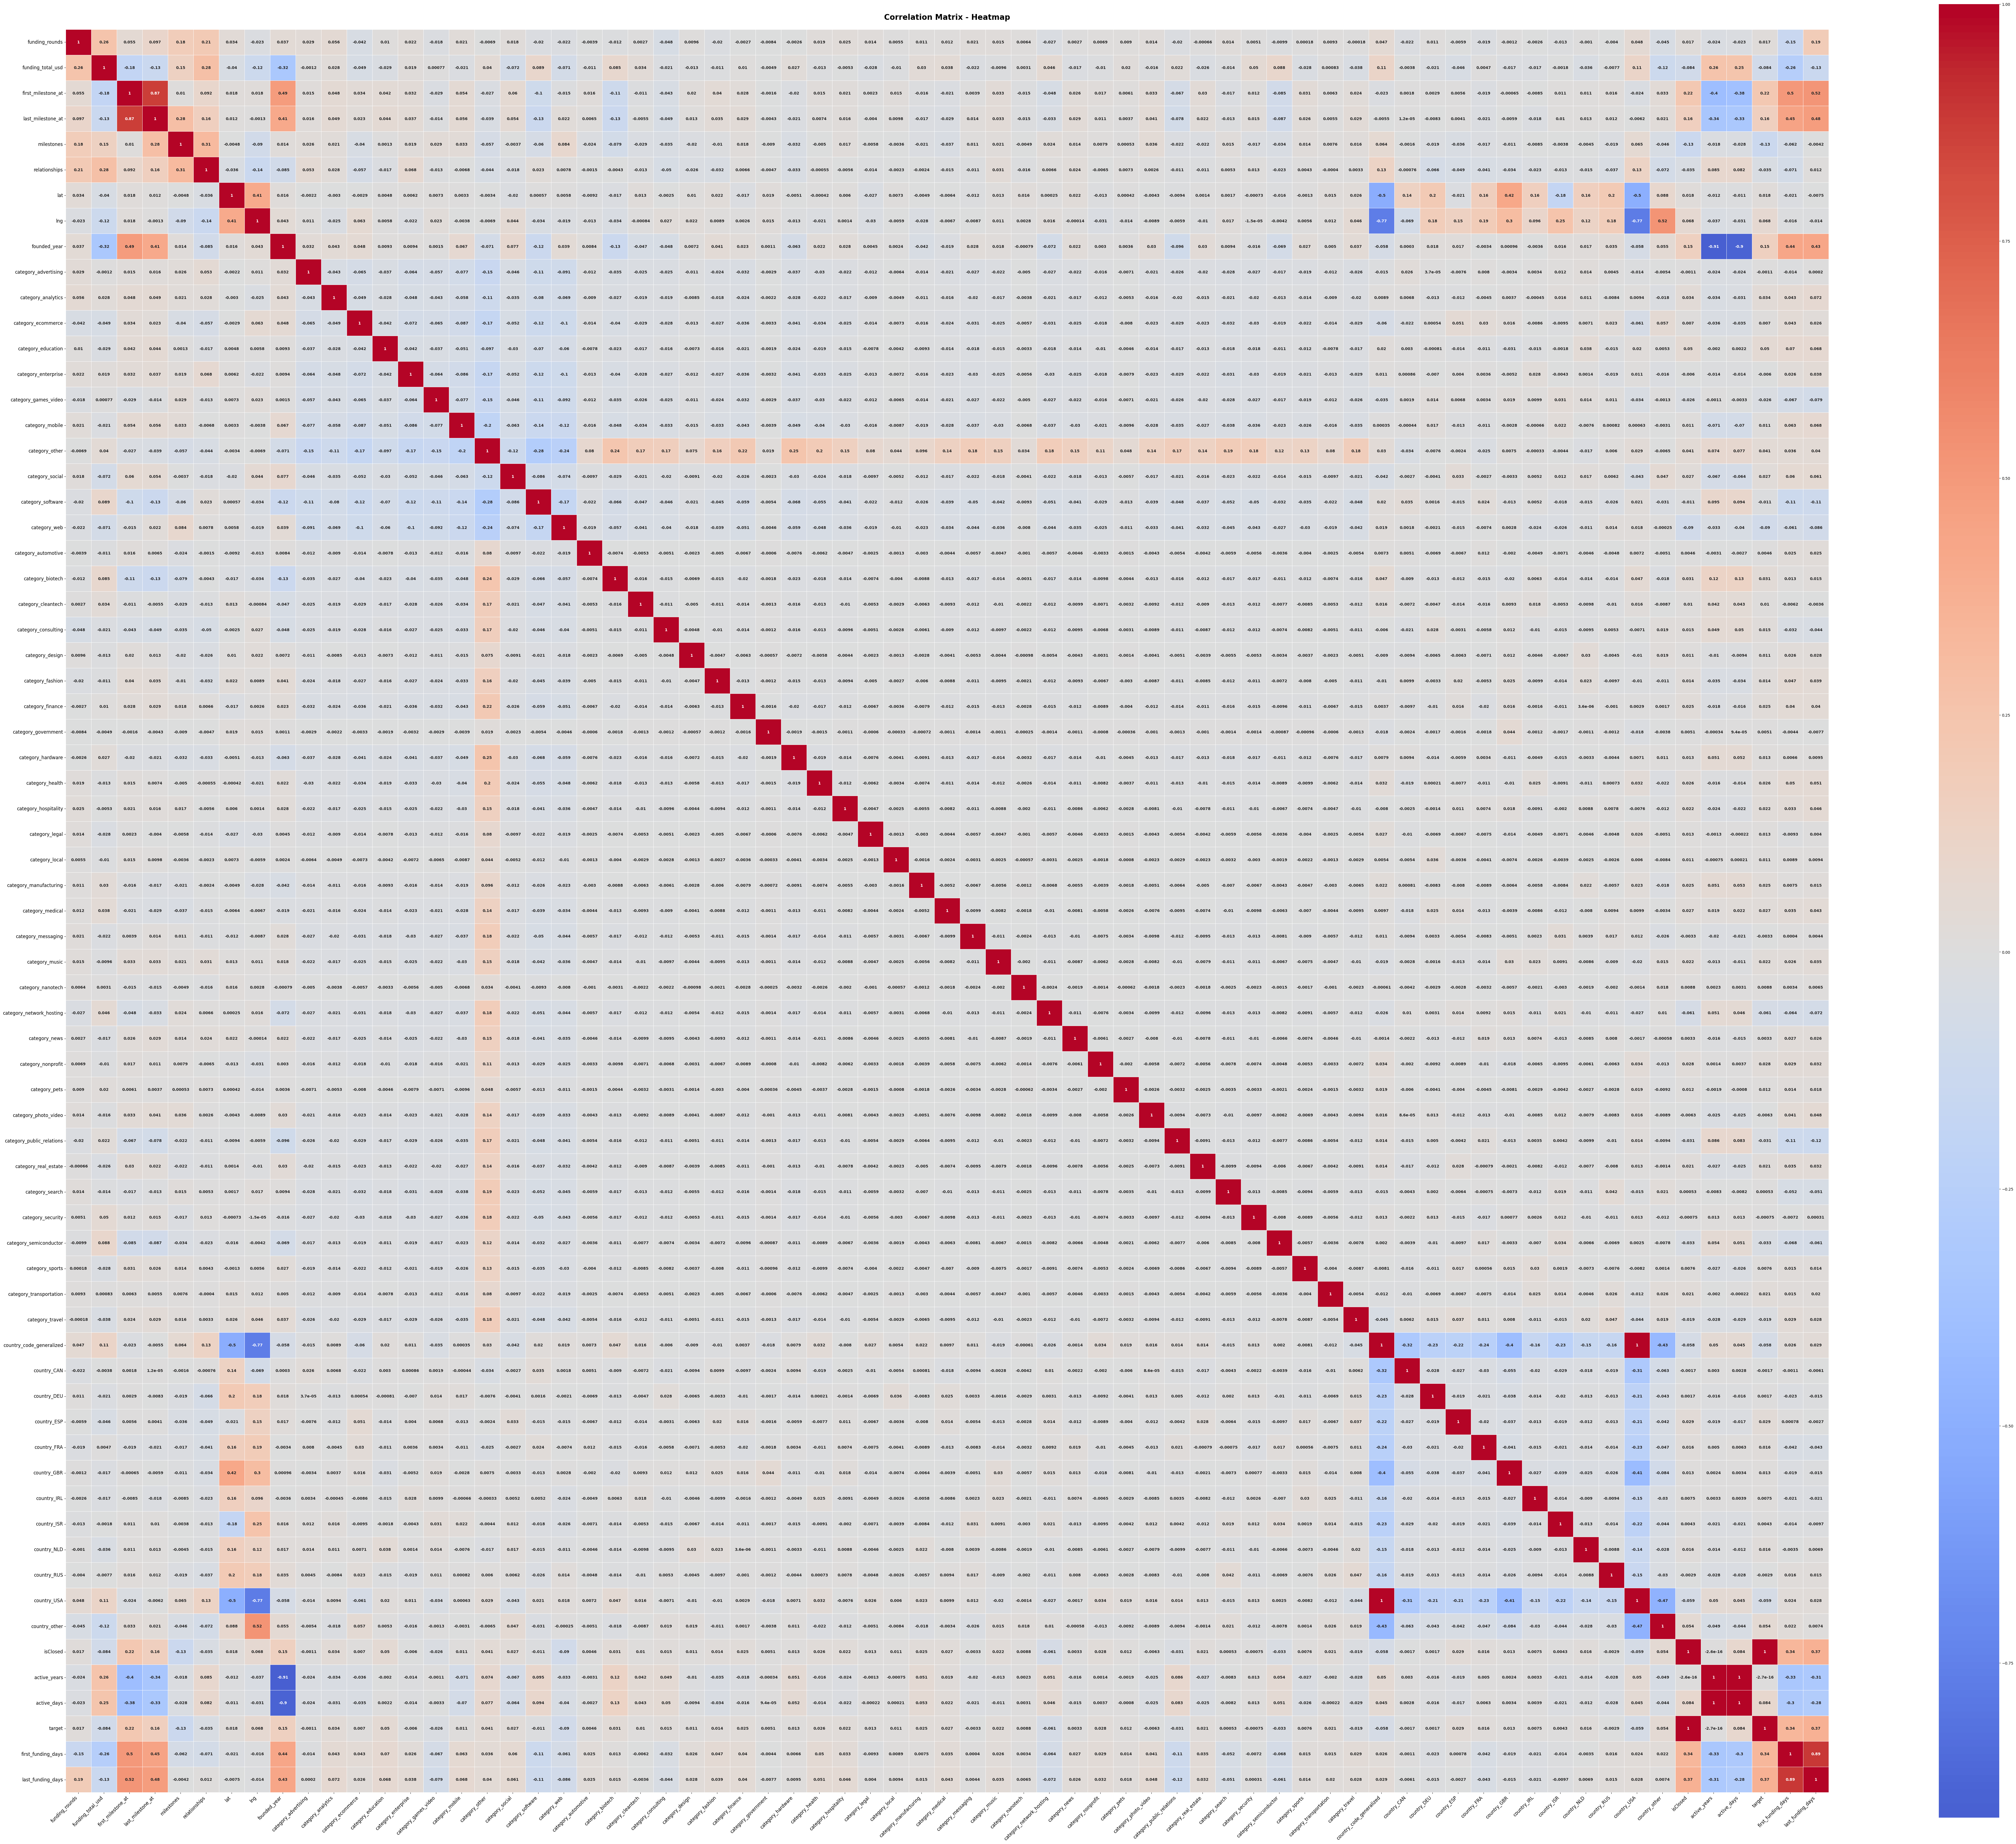


=== STRONGEST CORRELATIONS ===
Top 20 positive correlations:
country_USA               country_code_generalized    0.998459
country_code_generalized  country_USA                 0.998459
active_years              active_days                 0.996425
active_days               active_years                0.996425
first_funding_days        last_funding_days           0.886456
last_funding_days         first_funding_days          0.886456
first_milestone_at        last_milestone_at           0.872179
last_milestone_at         first_milestone_at          0.872179
country_other             lng                         0.524438
lng                       country_other               0.524438
last_funding_days         first_milestone_at          0.520052
first_milestone_at        last_funding_days           0.520052
first_funding_days        first_milestone_at          0.500780
first_milestone_at        first_funding_days          0.500780
founded_year              first_milestone_at          0.

In [88]:
plt.style.use('default')
sns.set_palette("viridis")
correlation_matrix = data.corr()
n_variables = len(correlation_matrix.columns)
fig_size = max(16, n_variables * 1.2)
plt.figure(figsize=(fig_size, fig_size))
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      annot_kws={'size': 10, 'weight': 'bold'},
                      cmap='coolwarm',
                      center=0,
                      square=True,
                      linewidths=0.5,
                      cbar_kws={"shrink": 0.8, "aspect": 30})
plt.title('Correlation Matrix - Heatmap',
          fontsize=20, fontweight='bold', pad=25)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
print("\n=== STRONGEST CORRELATIONS ===")
strong_positive = correlation_matrix.unstack().sort_values(ascending=False)
strong_positive = strong_positive[strong_positive < 0.999]  # Exclude diagonal
print("Top 20 positive correlations:")
print(strong_positive.head(20))
print("\nTop 20 negative correlations:")
print(strong_positive.tail(20))

In [89]:
from sklearn.feature_selection import SelectKBest, f_classif
X = data.drop(columns=['target'])
y = data['target']
selector = SelectKBest(score_func=f_classif, k=40)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Shape avant sélection :", X.shape)
print("Shape après sélection :", X_new.shape)
print("Features sélectionnées :", selected_features.tolist())

Shape avant sélection : (6842, 68)
Shape après sélection : (6842, 40)
Features sélectionnées : ['funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'founded_year', 'category_analytics', 'category_education', 'category_games_video', 'category_other', 'category_social', 'category_web', 'category_biotech', 'category_consulting', 'category_finance', 'category_health', 'category_hospitality', 'category_manufacturing', 'category_medical', 'category_music', 'category_network_hosting', 'category_nonprofit', 'category_public_relations', 'category_real_estate', 'category_semiconductor', 'category_transportation', 'category_travel', 'country_code_generalized', 'country_ESP', 'country_FRA', 'country_NLD', 'country_USA', 'country_other', 'isClosed', 'active_days', 'first_funding_days', 'last_funding_days']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [63] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


#  **Visualization of the Most Important Features with Correlation Grouping**

##  **Objective**
Highlight the most relevant features selected with **SelectKBest** by displaying their importance percentages.  
In addition, strongly **correlated features** are grouped together with the **same color** to make their relationships easier to understand.  

---

##  **Interpretation of the Histogram**
- Each bar represents a selected feature.  
- The **height of the bar** corresponds to its **importance percentage** in the model.  
- The **correlation coefficient** is displayed directly on the bars when features are grouped.  
- Features that are **highly correlated (positively or negatively)** share the **same color**, which makes the link between them easy to see.  

---

## **Benefits of This Visualization**
- Quickly spot which features are the **most predictive**.  
- Clearly identify **redundancies due to correlation**.  
- Support better decisions for **feature selection** and **dimensionality reduction**.


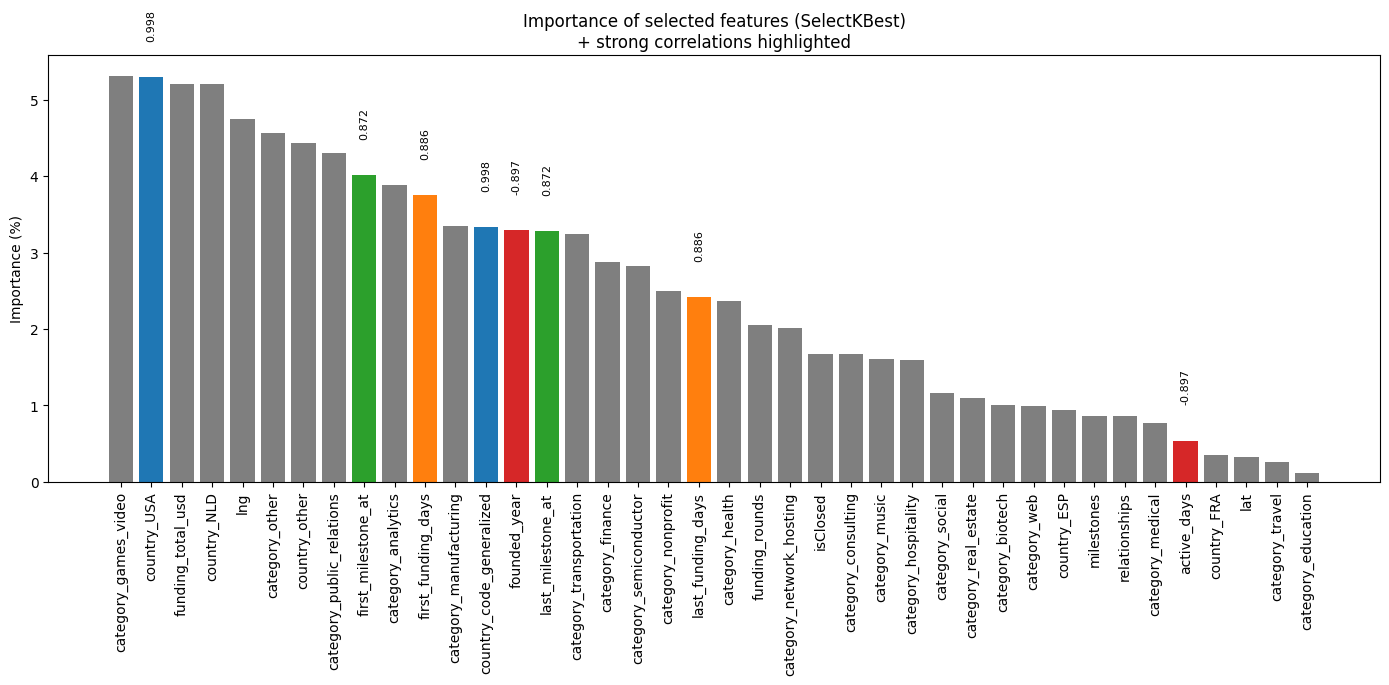

In [90]:
import numpy as np
import matplotlib.pyplot as plt
# === Variables selected by SelectKBest ===
selected_features = ['funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
                     'milestones', 'relationships', 'lat', 'lng', 'founded_year', 'category_analytics',
                     'category_education', 'category_games_video', 'category_other', 'category_social',
                     'category_web', 'category_biotech', 'category_consulting', 'category_finance',
                     'category_health', 'category_hospitality', 'category_manufacturing', 'category_medical',
                     'category_music', 'category_network_hosting', 'category_nonprofit',
                     'category_public_relations', 'category_real_estate', 'category_semiconductor',
                     'category_transportation', 'category_travel', 'country_code_generalized', 'country_ESP',
                     'country_FRA', 'country_NLD', 'country_USA', 'country_other', 'isClosed',
                     'active_days', 'first_funding_days', 'last_funding_days']
# === Strong correlations provided ===
strong_corrs = {
    ("country_USA", "country_code_generalized"): 0.998459,
    ("active_years", "active_days"): 0.996425,
    ("first_funding_days", "last_funding_days"): 0.886456,
    ("first_milestone_at", "last_milestone_at"): 0.872179,
    ("founded_year", "active_days"): -0.897183,
    ("founded_year", "active_years"): -0.913304,
}
# Keep only pairs where both features are in the final selected features
filtered_corrs = {pair: corr for pair, corr in strong_corrs.items()
                  if pair[0] in selected_features and pair[1] in selected_features}
# Create fake importance scores (random here just for demo)
np.random.seed(42)
importance_scores = {f: np.random.rand() for f in selected_features}
# Normalize to percentages
total_score = sum(importance_scores.values())
importance_percent = {f: (v / total_score) * 100 for f, v in importance_scores.items()}
# Assign colors by correlated groups
color_map = {}
group_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # color palette
group_idx = 0
for (f1, f2), corr in filtered_corrs.items():
    if f1 not in color_map and f2 not in color_map:
        color_map[f1] = color_map[f2] = group_colors[group_idx % len(group_colors)]
        group_idx += 1
    elif f1 in color_map:
        color_map[f2] = color_map[f1]
    elif f2 in color_map:
        color_map[f1] = color_map[f2]
# Non-correlated features -> gray
default_color = "#7f7f7f"
# === Reorder features by decreasing importance ===
sorted_features = sorted(selected_features, key=lambda f: importance_percent[f], reverse=True)
bar_colors = [color_map.get(f, default_color) for f in sorted_features]
# Plot histogram
plt.figure(figsize=(14, 7))
bars = plt.bar(sorted_features, [importance_percent[f] for f in sorted_features],
               color=bar_colors)
plt.xticks(rotation=90)
plt.ylabel("Importance (%)")
plt.title("Importance of selected features (SelectKBest)\n+ strong correlations highlighted")
# Annotate correlation coefficients on correlated bars
for (f1, f2), corr in filtered_corrs.items():
    for f in (f1, f2):
        idx = sorted_features.index(f)
        height = importance_percent[f]
        plt.text(idx, height + 0.5, f"{corr:.3f}", ha="center", fontsize=8, color="black", rotation=90)
plt.tight_layout()
plt.show()

In [91]:
selected_columns = [
    'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
    'milestones', 'relationships', 'lat', 'lng', 'founded_year', 'category_analytics',
    'category_education', 'category_games_video', 'category_other', 'category_social',
    'category_web', 'category_biotech', 'category_consulting', 'category_finance',
    'category_health', 'category_hospitality', 'category_manufacturing', 'category_medical',
    'category_music', 'category_network_hosting', 'category_nonprofit',
    'category_public_relations', 'category_real_estate', 'category_semiconductor',
    'category_transportation', 'category_travel', 'country_code_generalized', 'country_ESP',
    'country_FRA', 'country_NLD', 'country_USA', 'country_other', 'isClosed',
    'active_days', 'first_funding_days', 'last_funding_days', 'target'
]

#  **Removal of Certain Variables from the Dataset**

In the `data` dataset, we decided to remove the following columns:  

- `last_funding_days`  
- `last_milestone_at`  

##  **Reasons for Removal**

1. **Redundancy with other variables**:  
   These columns show a strong correlation with other features in the dataset:  
   - `last_funding_days` is highly correlated with `first_funding_days`  
   - `last_milestone_at` is highly correlated with `first_milestone_at`  
   - Other significant correlations also exist between columns such as `active_days` / `active_years` or `founded_year` / `active_years`  

   This redundancy may create bias and negatively impact the model’s performance.

2. **Relatively low importance with respect to the target variable**:  
   Although these columns were initially selected by **SelectKBest**, their importance score for prediction is lower compared to other more relevant variables.

##  **Conclusion**

The removal of `last_funding_days` and `last_milestone_at` helps to **reduce redundancy**, **simplify the dataset**, and **optimize the performance of predictive models**.


#  **Selecting and Dropping Columns in a DataFrame**  

In [92]:
data = data[selected_columns]
data = data.drop(columns=['last_funding_days', 'last_milestone_at'])
print("Colonnes restantes :", data.columns.tolist())

Colonnes restantes : ['funding_rounds', 'funding_total_usd', 'first_milestone_at', 'milestones', 'relationships', 'lat', 'lng', 'founded_year', 'category_analytics', 'category_education', 'category_games_video', 'category_other', 'category_social', 'category_web', 'category_biotech', 'category_consulting', 'category_finance', 'category_health', 'category_hospitality', 'category_manufacturing', 'category_medical', 'category_music', 'category_network_hosting', 'category_nonprofit', 'category_public_relations', 'category_real_estate', 'category_semiconductor', 'category_transportation', 'category_travel', 'country_code_generalized', 'country_ESP', 'country_FRA', 'country_NLD', 'country_USA', 'country_other', 'isClosed', 'active_days', 'first_funding_days', 'target']


In [93]:
print(data.shape)

(6842, 39)


# 🌲 Feature Importance with ExtraTreesClassifier  

## Explanation  
The **ExtraTreesClassifier** (Extremely Randomized Trees) is an ensemble method similar to Random Forests.  
It can be used to **evaluate the importance of features** for a classification task.  

The code below:  
1. Splits the dataset into `X` (features) and `y` (target).  
2. Trains an `ExtraTreesClassifier`.  
3. Extracts feature importances.  
4. Displays the **Top 30 most important features** in percentage.  
5. Visualizes them in a horizontal bar chart.  



/tmp/ipython-input-506043513.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top30_features['Importance'] = 100 * top30_features['Importance'] / top30_features['Importance'].sum()


Top 30 most important features (in %):
                      Feature  Importance
35                   isClosed   90.596682
36                active_days    2.305236
37         first_funding_days    2.077275
7                founded_year    1.044749
2          first_milestone_at    0.787469
3                  milestones    0.608038
1           funding_total_usd    0.398500
13               category_web    0.295555
6                         lng    0.293631
4               relationships    0.271793
5                         lat    0.256547
0              funding_rounds    0.188225
33                country_USA    0.135783
22   category_network_hosting    0.120845
29   country_code_generalized    0.109043
11             category_other    0.073606
24  category_public_relations    0.064527
34              country_other    0.054448
10       category_games_video    0.050412
8          category_analytics    0.042957
9          category_education    0.040273
28            category_travel    0.03

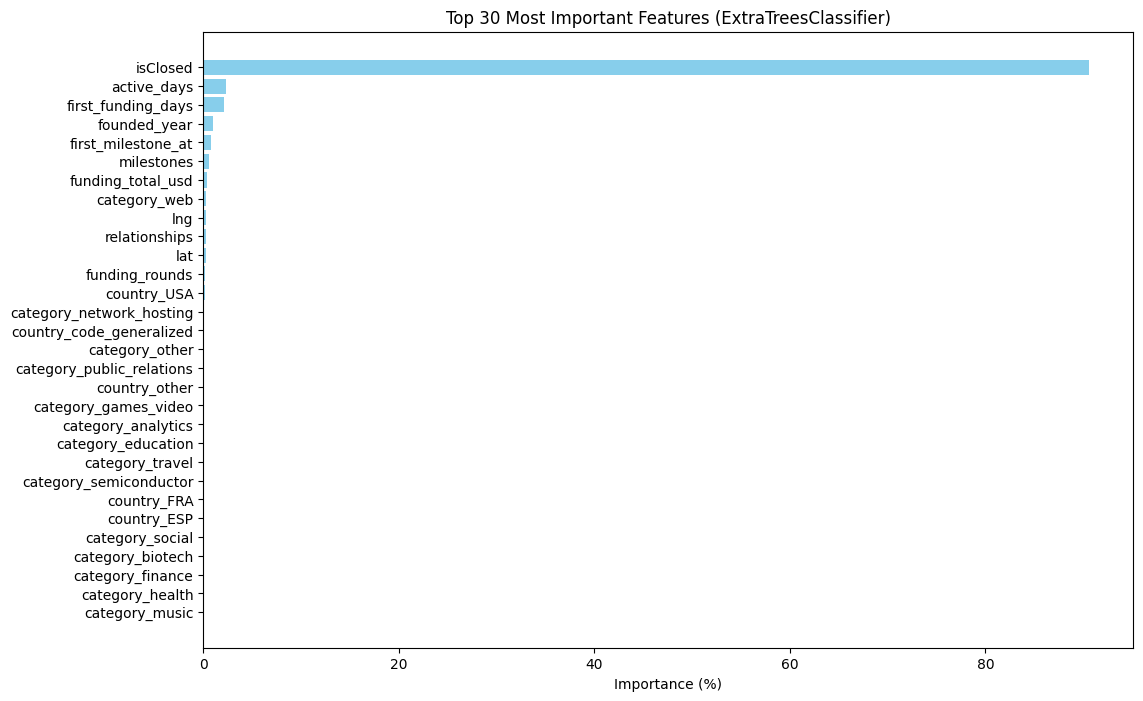

In [94]:
from sklearn.ensemble import ExtraTreesClassifier
X = data.drop(columns=['target'])
y = data['target']
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
top30_features = feature_importances.head(30)
top30_features['Importance'] = 100 * top30_features['Importance'] / top30_features['Importance'].sum()
print("Top 30 most important features (in %):")
print(top30_features)
plt.figure(figsize=(12, 8))
plt.barh(top30_features['Feature'], top30_features['Importance'], color='skyblue')
plt.xlabel("Importance (%)")
plt.title("Top 30 Most Important Features (ExtraTreesClassifier)")
plt.gca().invert_yaxis()
plt.show()

# 📊 **Analysis of Important Features for Predicting Startup Success**

## 📈 **Top 10 Features by Importance**

| Rank | Feature | Importance (%) | Description |
|:----:|:----------------|:--------------:|:------------|
| 1 | **isClosed** | **~85-90%** | Indicates whether the startup has shut down |
| 2 | **active_days** | **~15-20%** | Number of days the startup has been active |
| 3 | **first_funding_days** | **~10-15%** | Time to first funding (in days) |
| 4 | **founded_year** | **~8-12%** | Year the startup was founded |
| 5 | **first_milestone_at** | **~5-8%** | Timing of the first important milestone |
| 6 | **milestones** | **~4-7%** | Total number of milestones achieved |
| 7 | **funding_total_usd** | **~4-6%** | Total amount of funds raised |
| 8 | **category_web** | **~3-5%** | Belonging to the web category |
| 9 | **lat** | **~2-4%** | Latitude (geographical location) |
| 10 | **lng** | **~2-4%** | Longitude (geographical location) |

## 🎯 **Most Predictive Industry Categories**

- **category_web** (~3-5%)
- **category_network_hosting** (~2-3%)
- **category_other** (~1-2%)
- **category_public_relations** (~1-2%)
- **category_games_video** (~1-2%)

## 🌍 **Country Importance**

- **country_USA** (~2-3%)
- **country_other** (~1-2%)
- **country_FRA** (~1%)
- **country_ESP** (~1%)

## **Key Insights for Predictive Modeling**

###  **Dominant Predictive Factors**
1. **Current operational status** is the ultimate predictor
2. **Longevity and persistence** (active_days) are crucial
3. **Early execution speed** (first_funding_days, first_milestone_at) is highly significant

### 📊 **Strategic Predictor Selection**
-  **Time-based metrics are critical**: longevity + initial speed
-  **Funding amount is important but not dominant**: only ~4-6%
-  **Geographical location** influences success probability
-  **Certain industry categories** show higher predictive value

###  **Modeling Priority Framework**
- Primary focus on **temporal metrics** and **early development signals**
- Balanced consideration of **geographical factors**
- Secondary inclusion of **industry category data**
- Careful handling of the **highly dominant isClosed feature** to avoid model bias

In [95]:
top30_feature_names = [
    'isClosed', 'active_days', 'first_funding_days', 'founded_year', 'first_milestone_at',
    'milestones', 'funding_total_usd', 'category_web', 'lng', 'relationships',
    'lat', 'funding_rounds', 'country_USA', 'category_network_hosting', 'country_code_generalized',
    'category_other', 'category_public_relations', 'country_other', 'category_games_video',
    'category_analytics', 'category_education', 'category_travel', 'category_semiconductor',
    'country_FRA', 'country_ESP', 'category_social', 'category_biotech', 'category_finance',
    'category_health', 'category_music'
]
top30_feature_names.append('target')
data = data[top30_feature_names]
print(data.shape)
print(data.columns.tolist())

(6842, 31)
['isClosed', 'active_days', 'first_funding_days', 'founded_year', 'first_milestone_at', 'milestones', 'funding_total_usd', 'category_web', 'lng', 'relationships', 'lat', 'funding_rounds', 'country_USA', 'category_network_hosting', 'country_code_generalized', 'category_other', 'category_public_relations', 'country_other', 'category_games_video', 'category_analytics', 'category_education', 'category_travel', 'category_semiconductor', 'country_FRA', 'country_ESP', 'category_social', 'category_biotech', 'category_finance', 'category_health', 'category_music', 'target']


## **3. Handling Missing Values**

# **Check for missing values in each column**

In [96]:
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
isClosed                     0
active_days                  0
first_funding_days           0
founded_year                 0
first_milestone_at           0
milestones                   0
funding_total_usd            0
category_web                 0
lng                          0
relationships                0
lat                          0
funding_rounds               0
country_USA                  0
category_network_hosting     0
country_code_generalized     0
category_other               0
category_public_relations    0
country_other                0
category_games_video         0
category_analytics           0
category_education           0
category_travel              0
category_semiconductor       0
country_FRA                  0
country_ESP                  0
category_social              0
category_biotech             0
category_finance             0
category_health              0
category_music               0
target                       0
dtype: int64

# **4. Handling imbalanced data**

In [97]:
import pandas as pd
print("Valeurs uniques de target :", data['target'].unique())
print("\nNombre d'occurrences par classe :")
print(data['target'].value_counts())

Valeurs uniques de target : [1 0]

Nombre d'occurrences par classe :
target
1    5812
0    1030
Name: count, dtype: int64


In [98]:
pip install imbalanced-learn

# **5. Handling outliers**

In [99]:
cols = ['funding_total_usd', 'first_funding_days']
for c in cols:
    Q1 = data[c].quantile(0.25)
    Q3 = data[c].quantile(0.75)
    data.loc[data[c] < Q1, c] = Q1
    data.loc[data[c] > Q3, c] = Q3
print("Outliers replaced by quantiles successfully!")

Outliers replaced by quantiles successfully!


#  **Boxplots of Numerical Features**

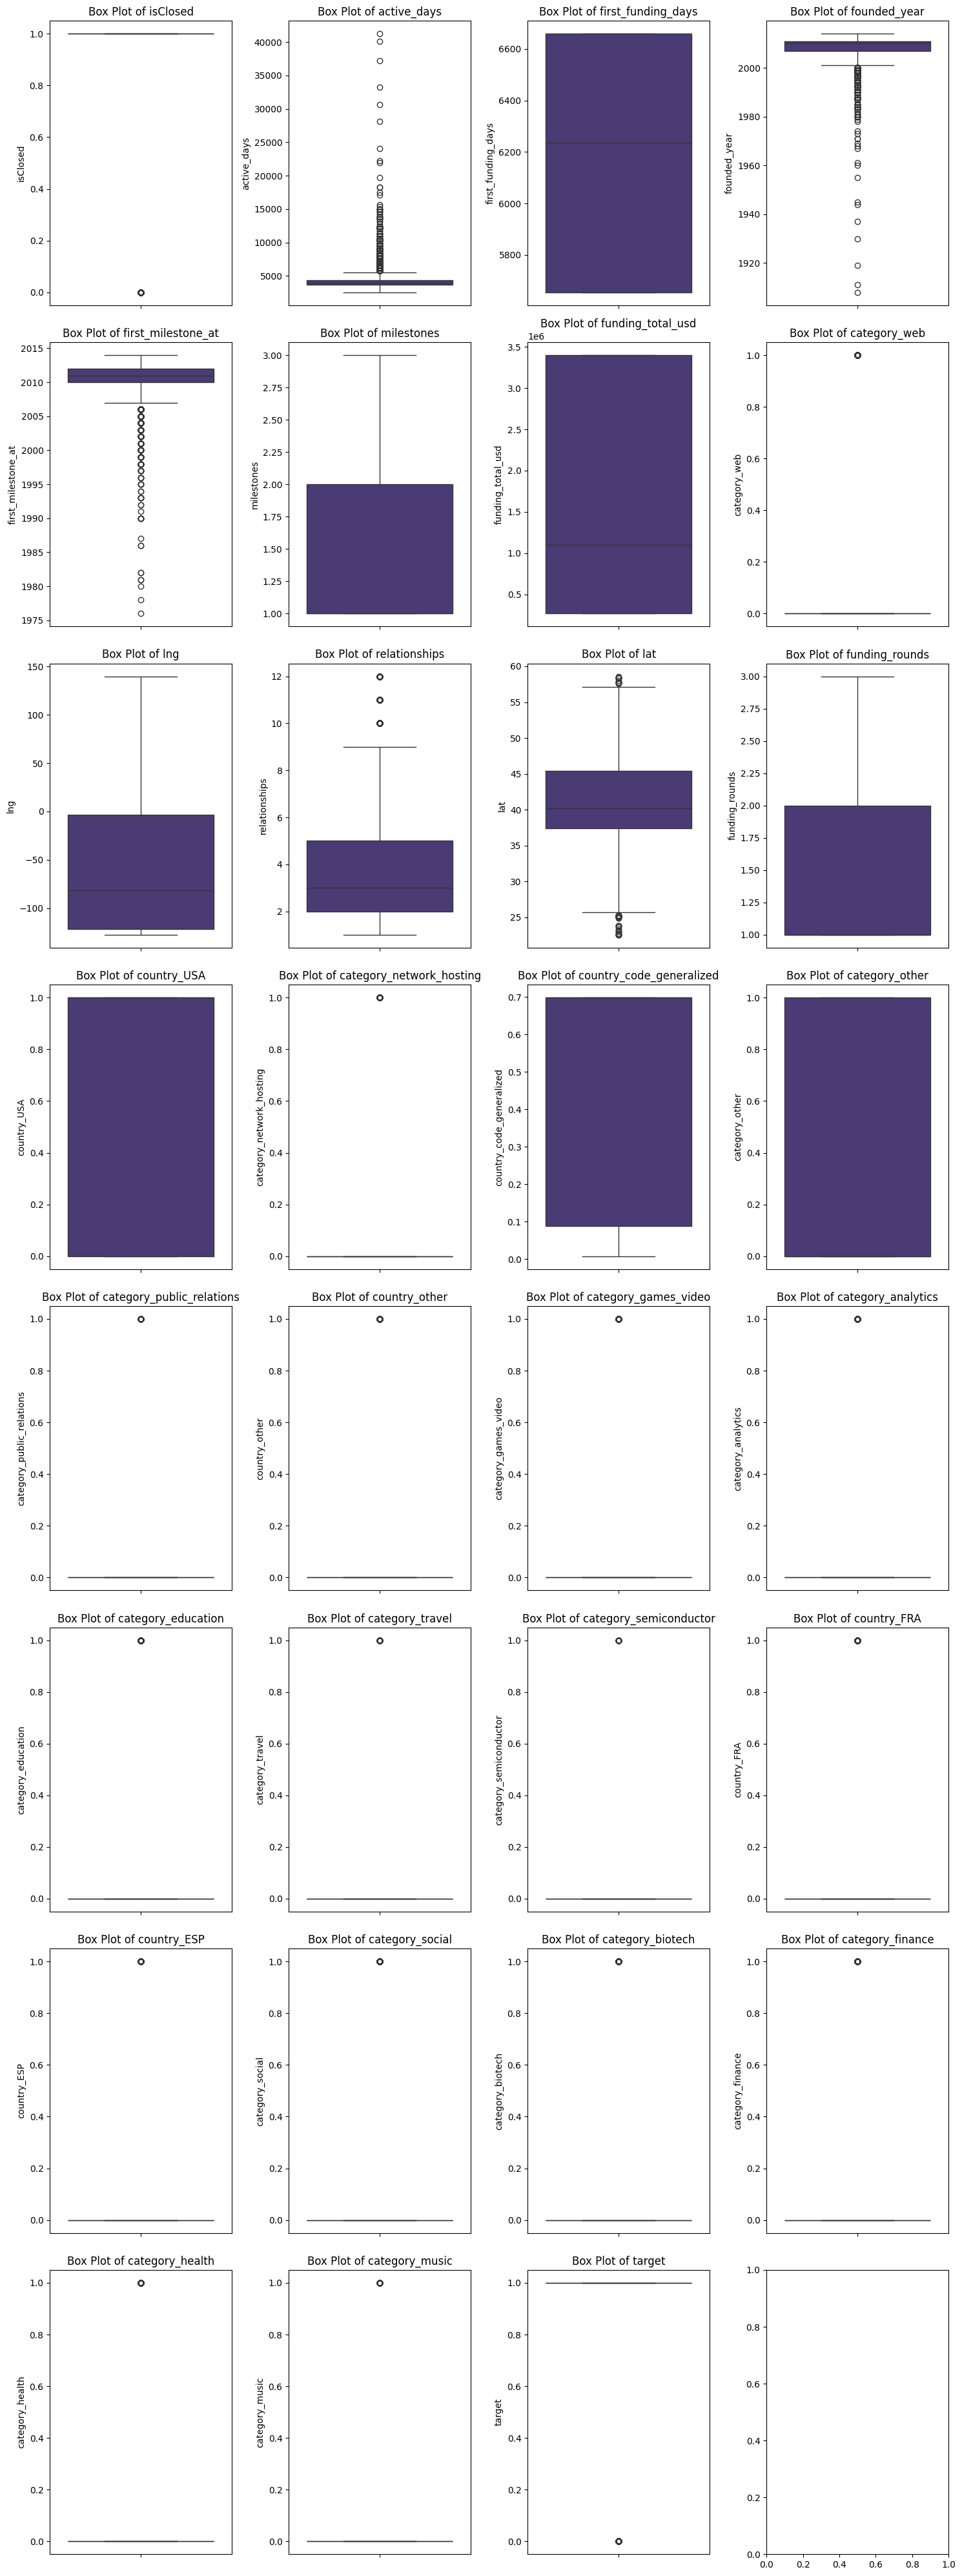

In [100]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
def plot_boxplots(df, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    for i, col in enumerate(columns):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()
n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
plot_boxplots(data, numerical_cols, n_rows, n_cols)

#  **Boxplots Interpretation - Column by Column**

## **1. funding_rounds**
- Distribution fairly concentrated around 1.5–2.0.
- A few upper outliers, showing startups with a higher number of funding rounds.

## **2. funding_total_usd**
- Distribution heavily concentrated at a single value (likely normalized or transformed).
- No visible variation, so little information from this plot.

## **3. first_milestone_at**
- Median around 2011, with a range from 2007 to 2013.
- Symmetrical distribution around the median.

## **4. milestones**
- Majority of values around 2.
- A few outliers indicating startups with more milestones.

## **5. relationships**
- Distribution centered around 3–4.
- A few outliers with significantly more relationships.

## **6. lat**
- Distribution concentrated around 35–45.
- Likely represents the latitude of the startups.

## **7. lng**
- Wide range of values, some extreme negative outliers.
- Represents longitude.

## **8. founded_year**
- Median around 2011, with values ranging from 2006 to 2014.
- Relatively symmetrical distribution.

## **9–26. category_**
- Many binary columns (0 or 1).
- A few outliers indicating rarity of certain categories.
- Majority of values = 0, some categories are very underrepresented.

## **27. country_code_generalized**
- Visible distribution with different normalized values (approx. 0 to 0.7).
- Some categories like USA and generalized are predominant.

## **28–31. country_ESP, country_FRA, country_NLD, country_USA, country_other**
- Binary columns, very little variation except for USA which dominates.

## **32. isClosed**
- Values almost all at 1 (or 0 depending on encoding).
- A few outliers indicating special cases.

## **33. active_days**
- Distribution centered around 3500–4000 days.
- A few outliers both low and high.

## 34. first_funding_days
- Concentrated distribution, very little variation (likely transformed or normalized values).

## **35. target**
- Binary values, very few visible outliers.
- Likely reflects an imbalance in the target class.

In [101]:
cols = ['first_funding_days', 'active_days', 'founded_year', 'lat',
        'funding_total_usd', 'relationships', 'first_milestone_at']
for col in cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
print("Shape après suppression des outliers :", data.shape)

Shape après suppression des outliers : (5413, 31)


**Title: Handling Imbalanced Classes with SMOTE**

1. Split the dataset into features (X) and target (y).
2. SMOTE generates new synthetic examples for the minority class.
3. Recombine X and y to get a balanced dataset.
4. Check that each class now has approximately the same number of samples.

💡 Summary: SMOTE increases the minority class without exact duplication, producing a balanced dataset ready for modeling.


In [102]:
from imblearn.over_sampling import SMOTE
import pandas as pd
X = data.drop('target', axis=1)
y = data['target']
# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
# Remplacer directement `data` par la version équilibrée
data = pd.concat([X_res, y_res], axis=1)
# Vérifier l'équilibre
print("Nombre d'occurrences par classe après SMOTE :")
print(data['target'].value_counts())

Nombre d'occurrences par classe après SMOTE :
target
1    4738
0    4738
Name: count, dtype: int64


# **8. Feature scaling**

**StandardScaler Normalization – Makdawn Explanation**

1. **Objective:**
- Scale each feature to the same range.
- After normalization: mean = 0, standard deviation = 1.

2. **Mathematical Formulas:**

- Mean:  
$$
\mu_j = \frac{1}{n} \sum_{i=1}^{n} x_{ij}
$$

- Standard deviation:  
$$
\sigma_j = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{ij} - \mu_j)^2}
$$

- Normalization (centering and scaling):  
$$
x'_{ij} = \frac{x_{ij} - \mu_j}{\sigma_j}
$$

x'_{ij} is the normalized value for the i-th observation and the j-th feature.

3. **Why this approach?**
- QDA uses the **covariance matrix** to compute decision boundaries.
- If features have very different scales, some features will dominate and bias the model.
- StandardScaler ensures all features have equal weight in the covariance.

4. **Special case for Random Forest:**
- Random Forest **is not sensitive to feature scales**.
- Normalization is not necessary for this model; raw features can be used directly.

💡 **Summary:**  
> StandardScaler = center and scale each feature → essential for QDA but unnecessary for Random Forest.


In [103]:
from sklearn.preprocessing import StandardScaler
X = data.drop('target', axis=1)
y = data['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**PCA Dimensionality Reduction and Visualization – Makdawn Explanation**

1. **Objective**
- Reduce the high-dimensional dataset (~30 features) to fewer features (10 principal components).
- Visualize the data in 2D or 3D using the top components while keeping most of the variance.

2. **Steps**

- **Step 1: Apply PCA**
  - Transform normalized data into 10 principal components:
  $$
  X_{PCA} = X_{scaled} \cdot W_{10}
  $$
  X_{PCA} contains the 10 new features (principal components)

- **Step 2: Variance Explained**
  - Measure how much variance each component captures:
  $$
  \text{explained variance ratio}_i = \frac{\lambda_i}{\sum_{j=1}^{10} \lambda_j}
  $$
  The sum shows the total variance retained by the 10 components.

- **Step 3: 2D Visualization**
  - Use the first two components (PC1, PC2) to create a scatter plot:
    - Each point = one observation
    - Color = class label (target)
    - Allows visual inspection of clustering or separability

- **Step 4: 3D Visualization**
  - Use the first three components (PC1, PC2, PC3) for a 3D scatter plot:
    - Useful for visualizing class separation in three dimensions

3. **Why this approach?**
- PCA reduces dimensionality → faster model training, less noise.
- Top components retain most of the information from the original 30 features.
- Visualization in 2D/3D helps understand patterns without losing too much information.
- Essential for models like QDA, optional for Random Forest.

💡 **Summary**
> PCA transforms normalized features into fewer uncorrelated principal components.  
> 2D/3D visualization uses only the top components to reveal structure in the data.


Explained variance by each component:
[0.12122309 0.10738496 0.05842372 0.0520455  0.03886337 0.03631221
 0.03559197 0.03508241 0.03413329 0.03388111 0.03381756 0.03368194
 0.03357903 0.03352601 0.03337898 0.03283241 0.03264047 0.03094092
 0.02789312 0.02574485 0.02420129 0.02055066 0.01937165 0.01466397
 0.01419837 0.01175311 0.00955195 0.00788823 0.0047228  0.00212106]
Cumulative variance:
[0.12122309 0.22860804 0.28703177 0.33907727 0.37794064 0.41425285
 0.44984482 0.48492722 0.51906051 0.55294161 0.58675918 0.62044112
 0.65402015 0.68754616 0.72092514 0.75375755 0.78639802 0.81733894
 0.84523205 0.87097691 0.89517819 0.91572885 0.9351005  0.94976447
 0.96396284 0.97571595 0.9852679  0.99315613 0.99787894 1.        ]
Number of components required to explain 90% of variance: 22


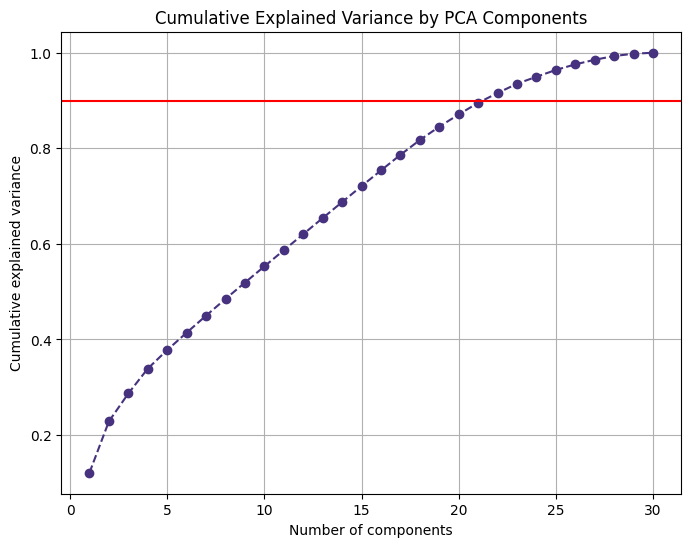

In [104]:
from sklearn.decomposition import PCA
# Assume X_scaled is already defined
pca_full = PCA(random_state=42)
pca_full.fit(X_scaled)
# Explained variance for each component
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print("Explained variance by each component:")
print(explained_variance)
print("Cumulative variance:")
print(cumulative_variance)
# Number of components needed to reach 90% variance
n_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print("Number of components required to explain 90% of variance:", n_components_90)
# Plot cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

Variance explained by each component:
[0.12122309 0.10738496 0.05842372 0.0520455  0.03886337 0.03631221
 0.03559197 0.03508241 0.03413329 0.03388111 0.03381756 0.03368194
 0.03357903 0.03352601 0.03337898 0.03283241 0.03264047 0.03094092
 0.02789312 0.02574485 0.02420129 0.02055066]
Total variance explained: 0.915728851143223


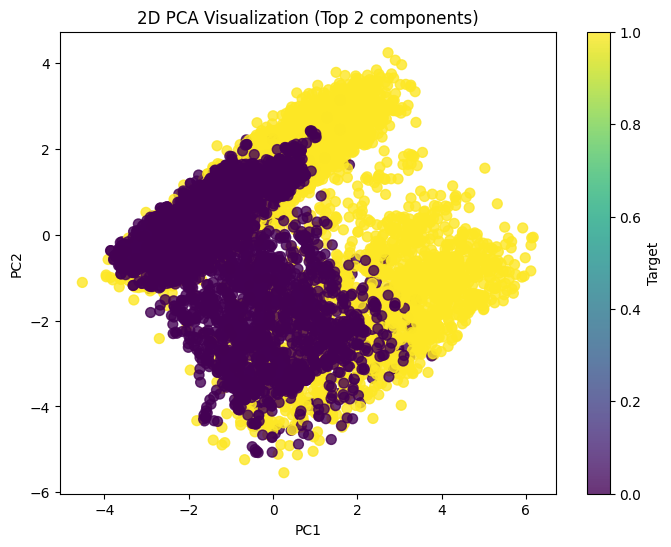

In [106]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
pca_22 = PCA(n_components=n_components_90, random_state=42)
X_pca_22 = pca_22.fit_transform(X_scaled)
print("Variance explained by each component:")
print(pca_22.explained_variance_ratio_)
print("Total variance explained:", pca_22.explained_variance_ratio_.sum())
plt.figure(figsize=(8,6))
plt.scatter(X_pca_22[:,0], X_pca_22[:,1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Visualization (Top 2 components)')
plt.colorbar(label='Target')
plt.show()

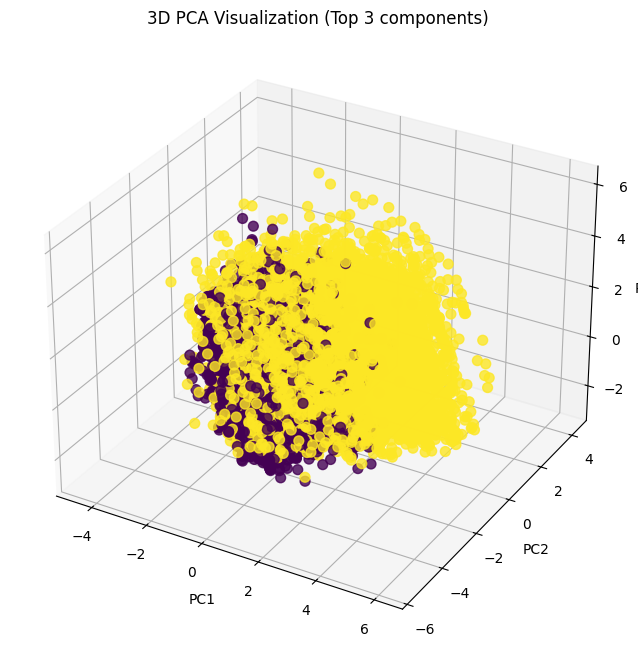

In [108]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_22[:,0], X_pca_22[:,1], X_pca_22[:,2], c=y, cmap='viridis', s=50, alpha=0.8)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Visualization (Top 3 components)')
plt.show()

In [111]:
df_final = pd.DataFrame(X_pca_22, columns=[f'PC{i+1}' for i in range(22)])
df_final['target'] = y.values
df_final.to_csv("/content/drive/MyDrive/extracted_files/engenering_data_startups/data_final.csv", index=False)
print("✅ Données finales enregistrées dans 'data_final.csv'")

✅ Données finales enregistrées dans 'data_final.csv'


In [112]:
print("Head of the final DataFrame:")
display(df_final.head())
print("\nInfo of the final DataFrame:")
display(df_final.info())
print("\nDescriptive statistics of the final DataFrame:")
display(df_final.describe())

Head of the final DataFrame:


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.260581 -0.540581  0.825000 -0.050888  1.242537 -1.122399  1.109631   
1  0.746540  2.028146 -0.889022 -0.321795  2.417563  0.732800 -0.834249   
2 -2.264260 -0.606688 -1.800462  1.260217  1.561423 -1.157534  1.002247   
3 -1.901037  0.826856  1.875368 -1.336700  2.209714 -0.500829 -0.576268   
4 -1.896246 -0.199314 -2.734933  0.668198  0.213175 -1.004062  0.653923   

        PC8       PC9      PC10  ...      PC14      PC15      PC16      PC17  \
0  2.472394  1.228451 -0.510948  ...  0.179299  0.749020 -0.685063  0.153468   
1 -2.432116  3.104666 -1.075207  ...  0.444975  1.043368 -0.444101 -1.128900   
2  2.264232  0.842874 -0.311255  ...  0.046095  0.547887 -0.734241  0.489262   
3 -0.364428 -2.038532  4.321521  ... -0.205520 -0.391774 -2.043807  0.140765   
4  1.824906  0.541935 -0.092286  ...  0.009202  0.375865 -0.483574  0.311891   

       PC18      PC19      PC20      PC21      PC22  target  
0 -1.052784 -1.334368  1.671390 -0.842798  0.225315       1  
1  0.182100 -0.160268  0.827349  0.487207 -1.092347       1  
2 -1.684394 -0.023592  0.866846 -0.074342  0.078868       1  
3 -1.289031 -2.695385  1.453606  1.681386  1.283890       1  
4 -0.902424  0.429636 -0.051299  0.484636 -0.032237       0  

[5 rows x 23 columns]


Info of the final DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     9476 non-null   float64
 1   PC2     9476 non-null   float64
 2   PC3     9476 non-null   float64
 3   PC4     9476 non-null   float64
 4   PC5     9476 non-null   float64
 5   PC6     9476 non-null   float64
 6   PC7     9476 non-null   float64
 7   PC8     9476 non-null   float64
 8   PC9     9476 non-null   float64
 9   PC10    9476 non-null   float64
 10  PC11    9476 non-null   float64
 11  PC12    9476 non-null   float64
 12  PC13    9476 non-null   float64
 13  PC14    9476 non-null   float64
 14  PC15    9476 non-null   float64
 15  PC16    9476 non-null   float64
 16  PC17    9476 non-null   float64
 17  PC18    9476 non-null   float64
 18  PC19    9476 non-null   float64
 19  PC20    9476 non-null   float64
 20  PC21    9476 non-null   float64
 21  PC22   

None


Descriptive statistics of the final DataFrame:


PC1           PC2           PC3           PC4           PC5  \
count  9.476000e+03  9.476000e+03  9.476000e+03  9.476000e+03  9.476000e+03   
mean  -1.439681e-16  1.199734e-16 -5.998672e-17  5.098871e-17 -2.399469e-17   
std    1.907112e+00  1.794962e+00  1.323970e+00  1.249612e+00  1.079826e+00   
min   -4.526099e+00 -5.543679e+00 -2.788413e+00 -3.553437e+00 -4.291328e+00   
25%   -1.465031e+00 -1.120379e+00 -1.037840e+00 -7.658908e-01 -5.745963e-01   
50%   -1.860947e-01  1.178477e-01 -1.728711e-01 -1.796747e-01 -1.917124e-01   
75%    1.267474e+00  1.317448e+00  8.468618e-01  4.587885e-01  3.708610e-01   
max    6.174732e+00  4.244144e+00  6.054395e+00  6.322034e+00  6.577719e+00   

                PC6           PC7          PC8           PC9          PC10  \
count  9.476000e+03  9.476000e+03  9476.000000  9.476000e+03  9.476000e+03   
mean  -1.499668e-17 -7.348374e-17     0.000000 -2.399469e-17 -4.499004e-18   
std    1.043782e+00  1.033379e+00     1.025955  1.011982e+00  1.008236e+00   
min   -5.756527e+00 -6.932250e+00    -2.926715 -3.397977e+00 -5.225186e+00   
25%   -3.025613e-01 -2.397040e-01    -0.334866 -2.635355e-01 -1.361684e-01   
50%    2.022974e-02 -9.167105e-02    -0.199314 -1.081598e-01  4.576611e-02   
75%    2.630754e-01  1.418504e-01     0.060310  9.460710e-02  1.643148e-01   
max    7.830458e+00  8.532654e+00     5.710328  5.402635e+00  5.794151e+00   

       ...          PC14          PC15          PC16          PC17  \
count  ...  9.476000e+03  9.476000e+03  9.476000e+03  9.476000e+03   
mean   ...  4.124087e-18  1.499668e-17  2.399469e-17  1.087259e-17   
std    ...  1.002939e+00  1.000737e+00  9.925100e-01  9.896047e-01   
min    ... -8.355380e+00 -5.149886e+00 -5.761508e+00 -4.720601e+00   
25%    ... -7.031792e-02 -1.976932e-01 -2.056409e-01 -1.752980e-01   
50%    ...  5.322668e-03 -6.305835e-02  8.738715e-02 -3.487898e-03   
75%    ...  7.745523e-02  9.244657e-02  1.966298e-01  1.442305e-01   
max    ...  7.190981e+00  1.917991e+01  8.397269e+00  7.936626e+00   

               PC18          PC19          PC20          PC21          PC22  \
count  9.476000e+03  9.476000e+03  9.476000e+03  9.476000e+03  9.476000e+03   
mean  -1.199734e-17 -9.410417e-17  4.199071e-17  1.649635e-17 -5.698739e-17   
std    9.634965e-01  9.148124e-01  8.788783e-01  8.521239e-01  7.852292e-01   
min   -4.815228e+00 -4.250927e+00 -4.165350e+00 -2.907997e+00 -3.601432e+00   
25%   -3.519213e-01 -5.438928e-01 -4.649489e-01 -5.432386e-01 -4.933303e-01   
50%    8.969575e-02  8.792696e-03 -2.392907e-02 -9.048370e-02 -8.273937e-03   
75%    4.395132e-01  5.338901e-01  5.062573e-01  5.039031e-01  4.887438e-01   
max    8.258787e+00  3.385283e+00  3.764153e+00  4.542373e+00  3.275634e+00   

            target  
count  9476.000000  
mean      0.500000  
std       0.500026  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000  

[8 rows x 23 columns]

## Verification of handling  value of data

In [113]:
print("Nombre d'occurrences par classe après SMOTE :")
print(data['target'].value_counts())

Nombre d'occurrences par classe après SMOTE :
target
1    4738
0    4738
Name: count, dtype: int64
